In [150]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from an Excel file
dataset = pd.read_excel("HousePricePrediction.xlsx")

# Print the first 5 records of the dataset to get an overview of the data
print(dataset.head(5))


   Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
0   0          60       RL     8450    Inside     1Fam            5   
1   1          20       RL     9600       FR2     1Fam            8   
2   2          60       RL    11250    Inside     1Fam            5   
3   3          70       RL     9550    Corner     1Fam            5   
4   4          60       RL    14260       FR2     1Fam            5   

   YearBuilt  YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0       2003          2003     VinylSd         0.0        856.0   208500.0  
1       1976          1976     MetalSd         0.0       1262.0   181500.0  
2       2001          2002     VinylSd         0.0        920.0   223500.0  
3       1915          1970     Wd Sdng         0.0        756.0   140000.0  
4       2000          2000     VinylSd         0.0       1145.0   250000.0  


In [151]:
dataset.shape


(2919, 13)

In [152]:
# Identify columns with object data type
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:", len(object_cols))

# Identify columns with integer data type
int_ = (dataset.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:", len(num_cols))

# Identify columns with float data type
fl = (dataset.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:", len(fl_cols))


Categorical variables: 4
Integer variables: 0
Float variables: 3


<Axes: >

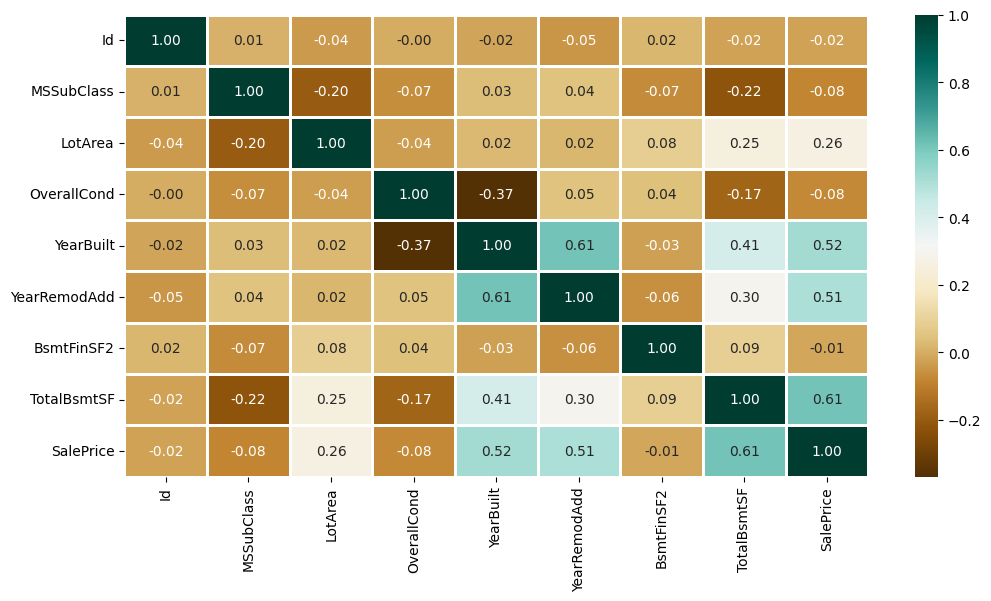

In [153]:
# Select only numerical features for correlation analysis
numerical_dataset = dataset.select_dtypes(include=['number'])

# Set the figure size for the heatmap
plt.figure(figsize=(12, 6))

# Create a heatmap to visualize the correlation between numerical features
sns.heatmap(numerical_dataset.corr(),  # Compute the correlation matrix
            cmap='BrBG',               # Set the color map
            fmt='.2f',                 # Format the annotations to 2 decimal places
            linewidths=2,              # Set the width of the lines that will divide each cell
            annot=True)                # Annotate each cell with the correlation value

<Axes: title={'center': 'No. Unique values of Categorical Features'}>

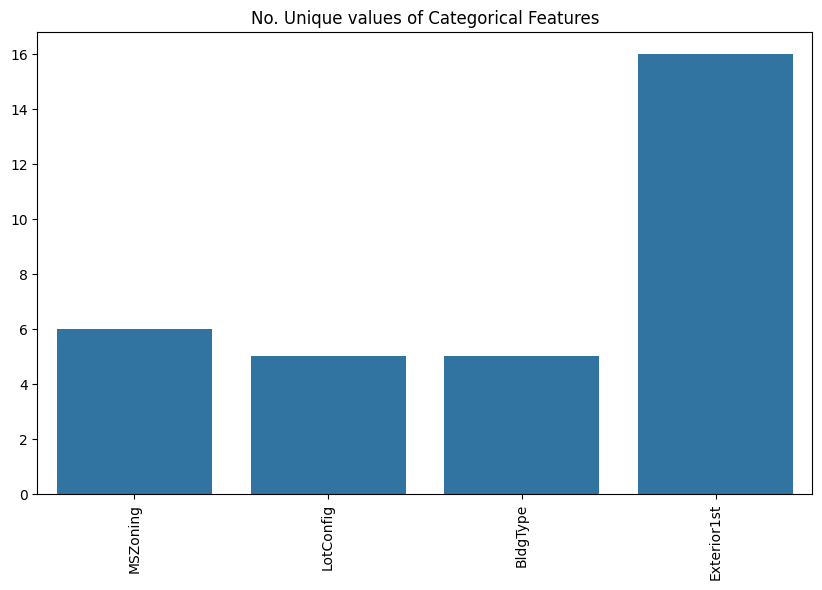

In [154]:
# Initialize an empty list to store the number of unique values for each categorical column
unique_values = []

# Iterate over each categorical column to calculate the number of unique values
for col in object_cols:
  unique_values.append(dataset[col].unique().size)

# Set the figure size for the plot
plt.figure(figsize=(10, 6))

# Set the title for the plot
plt.title('No. Unique values of Categorical Features')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Create a bar plot to visualize the number of unique values for each categorical feature
sns.barplot(x=object_cols, y=unique_values)

C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_20652\2786000746.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(y.index), y=y, palette='viridis')
C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_20652\2786000746.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(y.index), y=y, palette='viridis')
C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_20652\2786000746.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(y.index), y=y, palette='viridis')
C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_20652\2786000746.py:25: Fu

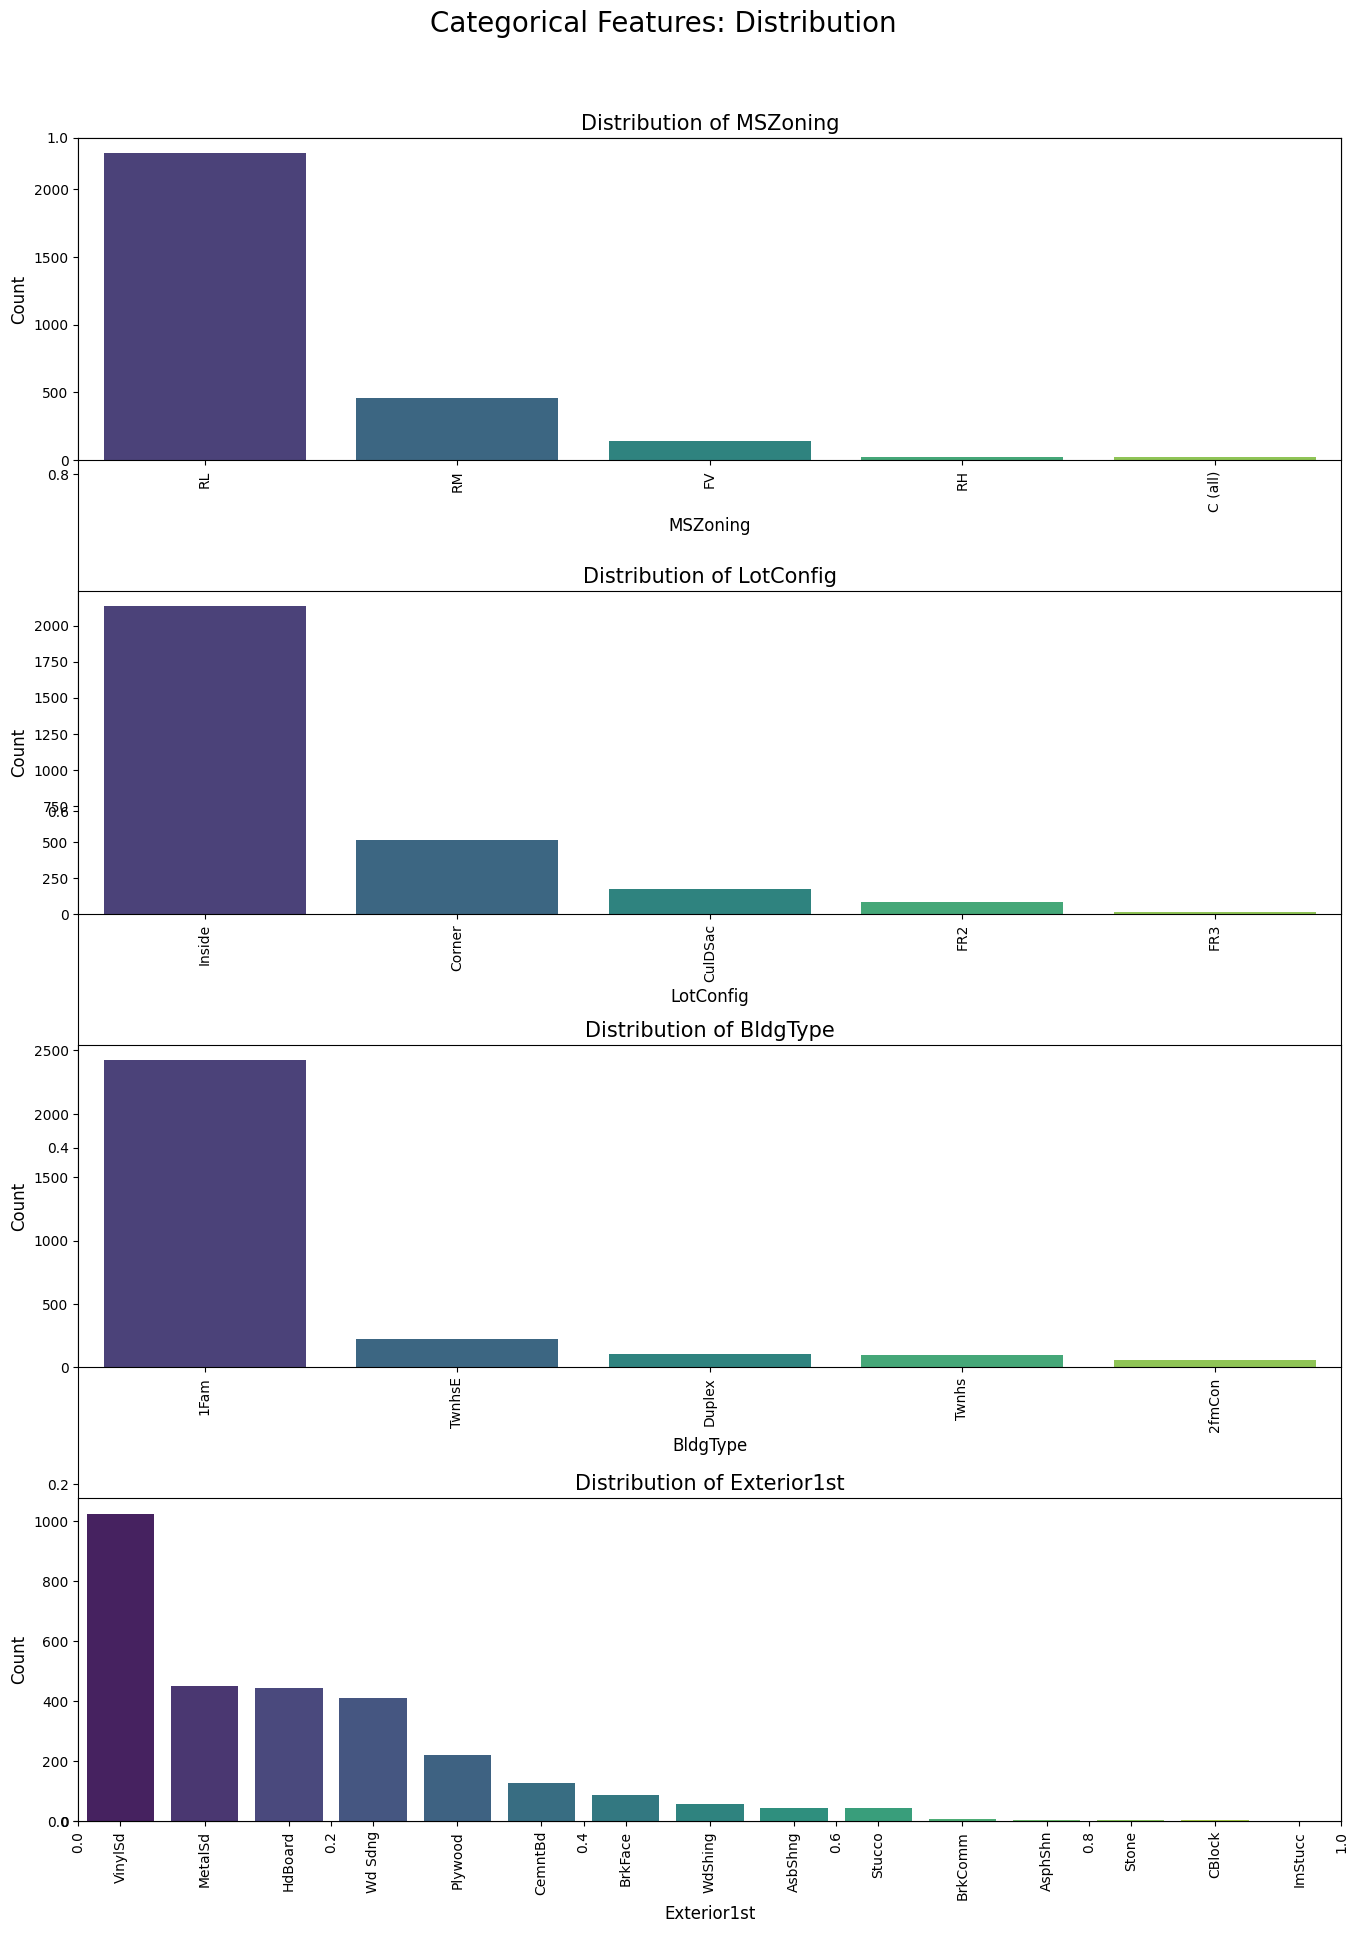

In [155]:
# Set the figure size for the plot
plt.figure(figsize=(14, 20))

# Set the title for the entire figure
plt.suptitle('Categorical Features: Distribution', fontsize=20)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Initialize the subplot index
index = 1

# Iterate over each categorical column to plot its distribution
for col in object_cols:
	# Get the value counts for the current column
	y = dataset[col].value_counts()
	
	# Create a subplot for the current column
	plt.subplot(4, 1, index)
	
	# Rotate the x-axis labels for better readability
	plt.xticks(rotation=90)
	
	# Create a bar plot for the current column
	sns.barplot(x=list(y.index), y=y, palette='viridis')
	
	# Set the title for the current subplot
	plt.title(f'Distribution of {col}', fontsize=15)
	
	# Set the x-axis label for the current subplot
	plt.xlabel(col, fontsize=12)
	
	# Set the y-axis label for the current subplot
	plt.ylabel('Count', fontsize=12)
	
	# Increment the subplot index
	index += 1

# Adjust the layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Display the plot
plt.show()


In [156]:
dataset.drop(['Id'],
			axis=1,
			inplace=True)


In [157]:
# Fill missing values in the 'SalePrice' column with the mean of the 'SalePrice' column
dataset['SalePrice'] = dataset['SalePrice'].fillna(dataset['SalePrice'].mean())


In [158]:
new_dataset = dataset.dropna()


In [159]:
# Check for missing values in the new_dataset
new_dataset.isnull().sum()


MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

In [160]:
from sklearn.preprocessing import OneHotEncoder

# List of categorical variables
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ', len(object_cols))


Categorical variables:
['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
No. of. categorical features:  4


In [161]:
# Initialize the OneHotEncoder with specified parameters
OH_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit and transform the categorical features in the dataset
OH_cols = pd.DataFrame(OH_encoder.fit_transform(new_dataset[object_cols]))

# Set the index of the new one-hot encoded columns to match the original dataset
OH_cols.index = new_dataset.index

# Rename the columns of the one-hot encoded dataframe
OH_cols.columns = OH_encoder.get_feature_names_out()

# Drop the original categorical columns from the dataset
df_final = new_dataset.drop(object_cols, axis=1)

# Concatenate the original dataset (without categorical columns) with the one-hot encoded columns
df_final = pd.concat([df_final, OH_cols], axis=1)

In [162]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

# Define the feature matrix X and the target vector Y
X = df_final.drop(['SalePrice'], axis=1)
Y = df_final['SalePrice']

# Split the dataset into training and validation sets
X_train, X_valid, Y_train, Y_valid = train_test_split(
	X, Y, train_size=0.8, test_size=0.2, random_state=0)


In [165]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error

# Initialize and train the Linear Regression model
model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)

# Predict the target values for the validation set
Y_pred = model_LR.predict(X_valid)

# Calculate MAPE
lr_mape = mean_absolute_percentage_error(Y_valid, Y_pred)

# Print MAPE
print("Linear Regression MAPE:", lr_mape)


Linear Regression MAPE: 0.187416838415999
